In [1]:
import pathlib
import cv2

import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder = pathlib.Path('./../dataset/seq50rect3')
images = list(folder.iterdir())
images = [cv2.imread(str(img), cv2.IMREAD_GRAYSCALE) for img in images]

In [35]:
img1 = images[0] # queryImage
img2 = images[1] # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []

for m, n in matches:
    if m.distance < 0.25*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

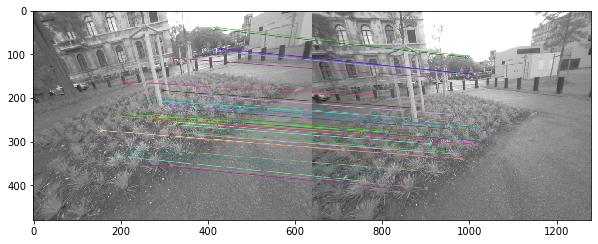

(<matplotlib.image.AxesImage at 0x1def6acd808>, None)

In [36]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.dpi = 1200
plt.imshow(img3), plt.show()

In [25]:
pts_im1 = [kp1[m[0].queryIdx].pt for m in good]
pts_im1 = np.array(pts_im1, dtype=np.float32).T
pts_im2 = [kp2[m[0].trainIdx].pt for m in good]
pts_im2 = np.array(pts_im2, dtype=np.float32).T

In [31]:
retval, mask = cv2.findHomography(pts_im1.T, pts_im2.T, cv2.RANSAC, 50.0)

In [39]:
src_pts = np.float32([ kp1[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
matchesMask = mask.ravel().tolist()
h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

In [41]:
img1c = cv2.imread()
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

TypeError: Expected cv::DMatch for argument 'matches1to2'

TypeError: Image data of dtype object cannot be converted to float

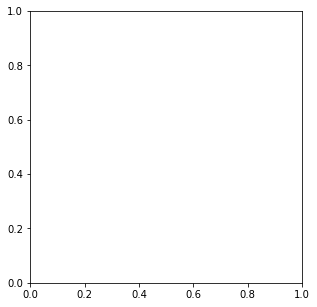

In [44]:
images = [cv2.imread(str(img)) for img in images]
img1c = images[0]
plt.imshow(img1c)